In [1]:
import numpy as np
from numpy.random import choice
from tqdm import trange

# Main Stat Probability

In [2]:
prob_matrix = np.zeros([11, 20])
p = np.array([0.35, 0.35, 0.35, 0.2, 0.2, 0.2, 0.2, 0.15, 0.1, 0.05, 0])

# trial 1
prob_matrix[0, :] = (1-p[0]) ** np.array(range(1, 21))
prob_matrix[1, 0] = p[0]

for trial in range(2, 20+1):
    prob_matrix[1:, trial-1] = prob_matrix[0:-1, trial-2] * p[:-1] + prob_matrix[1:, trial-2] * (1-p[1:])

In [3]:
result = np.round(prob_matrix[:, -1]*100, 4)
for level in range(len(result)):
    print(f'level {level:2d}: {result[level]:7.4f}%')

level  0:  0.0181%
level  1:  0.1952%
level  2:  0.9985%
level  3: 11.0237%
level  4: 21.5075%
level  5: 24.9608%
level  6: 20.2083%
level  7: 13.8499%
level  8:  5.8161%
level  9:  1.3055%
level 10:  0.1163%


# Main Stat Conditional Probability

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

probs = [
    [0.0134627433446289, 0.0724916949326172, 0.175652953105957, 0.388489199823047, 0.236979981426563, 0.0878932617609375, 0.02126380265625, 0.0034857032, 0.00027253065, 0.00000807765, 0.00000005145],
    [0.0134627433446289,0.0724916949326172, 0.342148324458691, 0.323556677653125, 0.173085672998438, 0.0593377792875, 0.014142574775, 0.00168853755, 0.0000847896, 0.0000012054],
    [0.0134627433446289, 0.219126691129199, 0.334180475827735, 0.259069104229688, 0.12433657569375, 0.04198877375, 0.007267201725, 0.0005551161, 0.0000133182],
    [0.1073741824, 0.268435456, 0.301989888, 0.201326592, 0.0950430568250001, 0.023186047125, 0.00255215715, 9.26205000000001E-05],
    [0.1073741824, 0.268435456, 0.301989888, 0.22508735620625, 0.08287531618125, 0.013507141425, 0.0007306597875],
    [0.1073741824, 0.268435456, 0.358261727051563, 0.210253175245313, 0.051568014159375, 0.00410744514375],
    [0.1073741824, 0.358000887762891, 0.373822882911328, 0.143802598242188, 0.0169994486835938],
    [0.196874404340723, 0.455412107277832, 0.294763390137305, 0.0529500982441406],
    [0.3486784401, 0.500116998276758, 0.151204561623242],
    [0.598736939238379, 0.401263060761621],
    [1]
]

In [5]:
heatmap_matrix = np.zeros([11, 11])
for row in range(11):
    heatmap_matrix[row, row:] = probs[row]

heatmap_matrix_cumsum = heatmap_matrix[:, ::-1].cumsum(axis=1)[:, ::-1]
heatmap_matrix_cumsum = np.triu(heatmap_matrix_cumsum)

<Axes: >

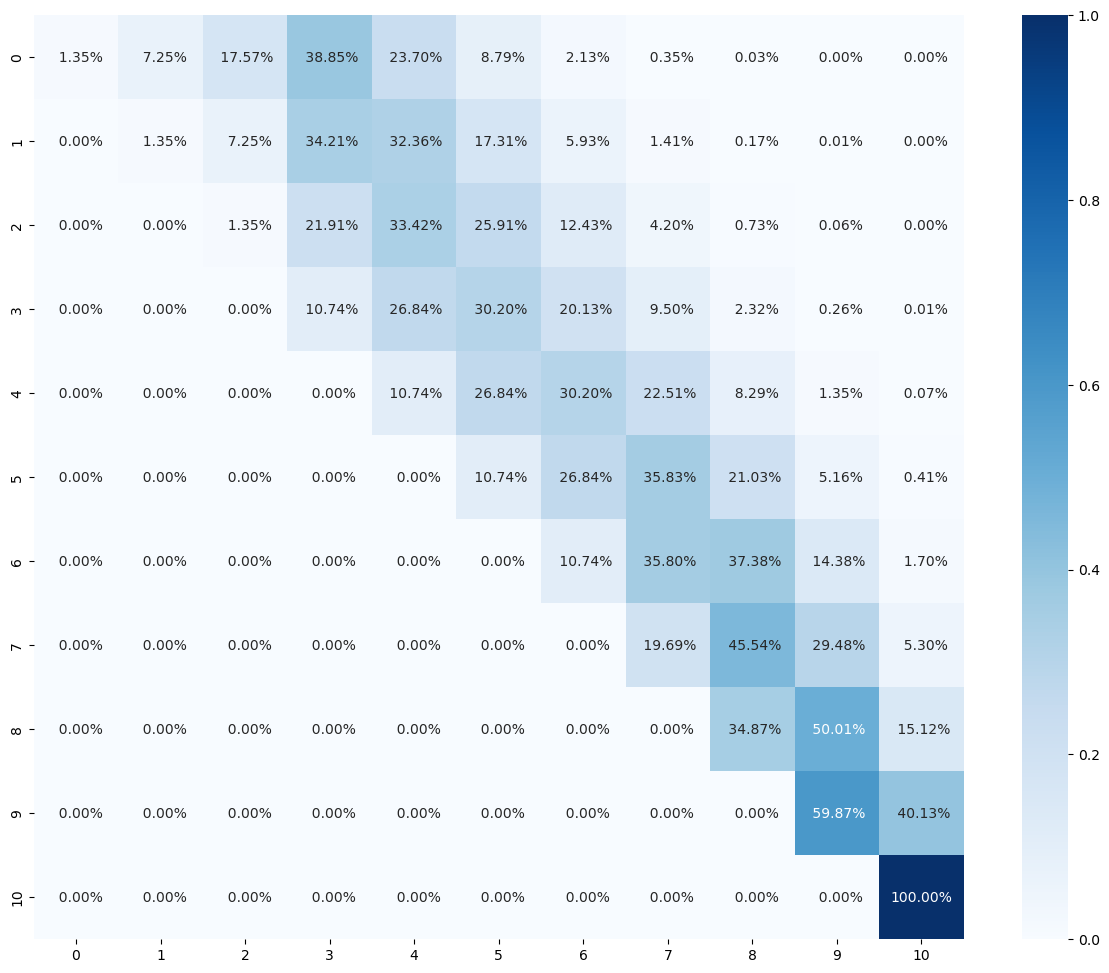

In [6]:
fig, sub = plt.subplots(1, 1, dpi=100, figsize=(15, 12))  
sns.heatmap(heatmap_matrix, vmin=0, vmax=1, annot=True, fmt='7.2%', cmap='Blues')


<Axes: >

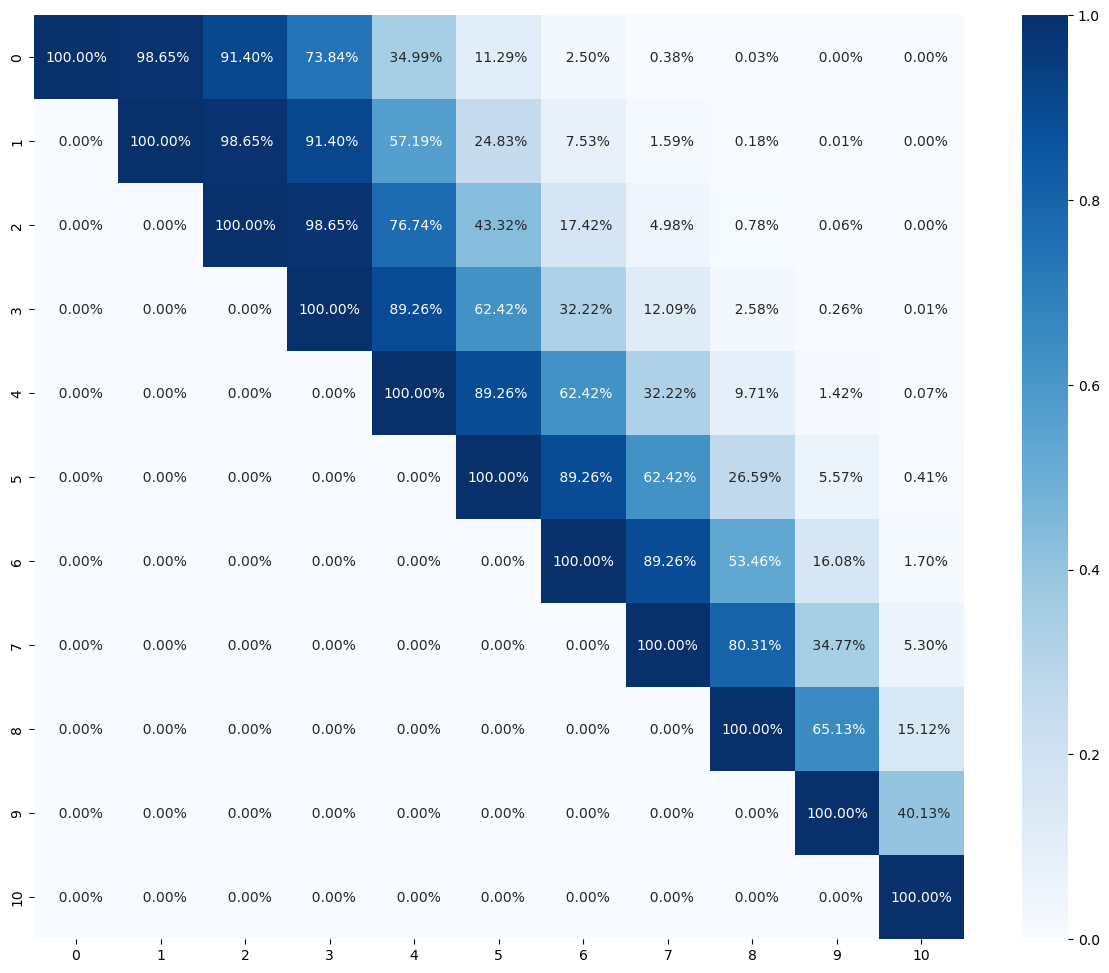

In [7]:
fig, sub = plt.subplots(1, 1, dpi=100, figsize=(15, 12))
sns.heatmap(heatmap_matrix_cumsum, vmin=0, vmax=1, annot=True, fmt='7.2%', cmap='Blues')
